## Estadística Aplicada
Sesion 16 - 24 oct

Cinthia Zayde Gabrielle Garcia Belmonte 2076329

In [24]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
#pdarima
import pmdarima as pm

In [26]:
# Data
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
## asignar formato mensual
pasajeros = pasajeros.asfreq('MS')

In [ ]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

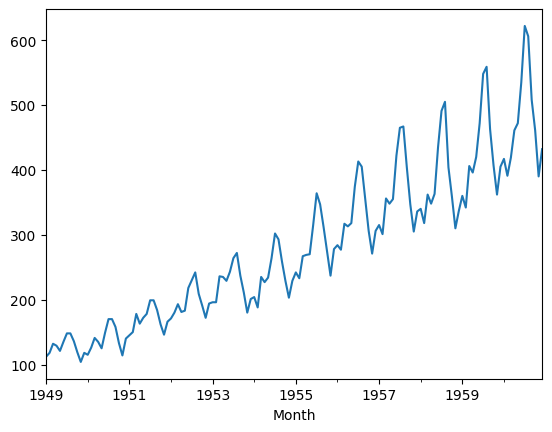

In [ ]:
pasajeros['Thousands of Passengers'].plot();

Es una serie con componente estacional

## Prueba dickey - Fuller 

In [ ]:
prueba_adf = adfuller(pasajeros['Thousands of Passengers'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.99

No rechazamos $H_0$, significa que Thousands of Passengers es una serie no estacionaria

In [ ]:
## Aplicando primeras diferencias
pasajeros['1ras_diff'] = pasajeros['Thousands of Passengers'].diff()

In [ ]:
pasajeros.head()

,Thousands of Passengers,1ras_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


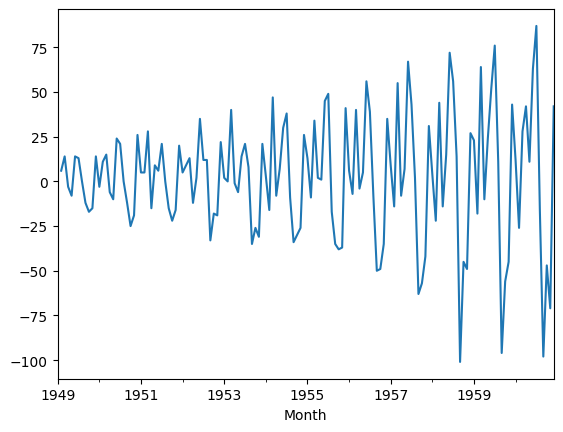

In [ ]:
pasajeros['1ras_diff'].plot();

In [ ]:
# Prueba dickey fuller 
prueba_adf1 = adfuller(pasajeros['1ras_diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(3)

0.054

Rechazar $H_0$ significa que las 1ras diferencias son estacionarias

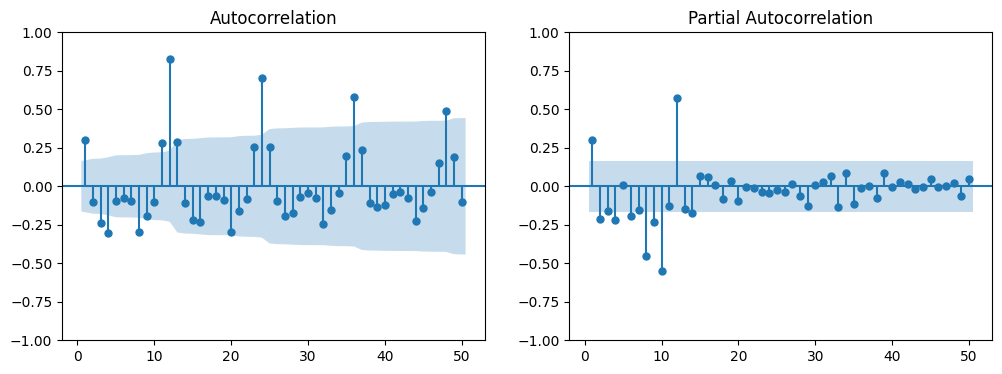

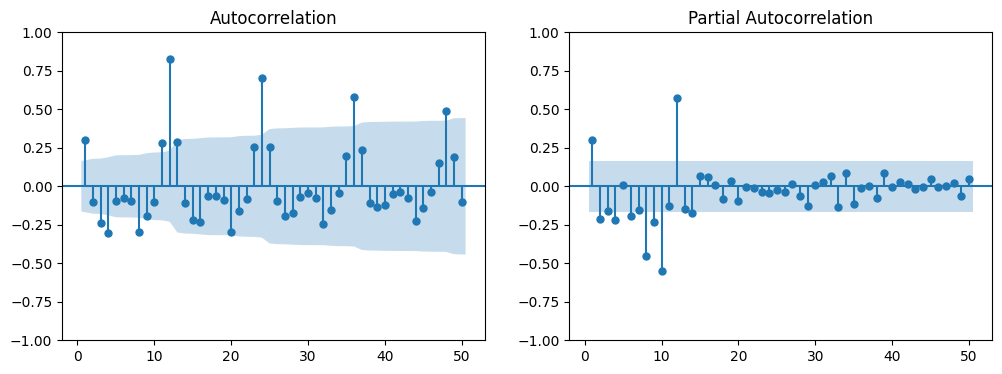

In [ ]:
## graficas de correlaciones
ig, ax = plt.subplots(1,2,figsize= (12,4))
## 1er subgrafica
plot_acf(pasajeros['1ras_diff'].dropna(), zero=False, lags=50, ax=ax[0])
plot_pacf(pasajeros['1ras_diff'].dropna(), zero=False, lags=50, ax=ax[1])

El patron de las graficas de autocorrelacio  nos muestran que una serie con componente estacional

Entontrar el orden de la Arima(P, i(d), q) utilizando pmdarima

In [29]:
pm.auto_arima(pasajeros['Thousands of Passengers'], 
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              m=12,
              seasonal=True,
              ic='aic',
              start_P=1, start_Q=1,
              max_P=7, max_Q=7,
              error_action='ignore',
              suppress_warnings=True)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Thousands of pasangers es un ARIMA(0,1,1)(2,1,0)

In [31]:
model = ARIMA(pasajeros['Thousands of Passengers'],
              order=(0,1,1),
              seasonal_order=(2,1,0,12))
results = model.fit()

In [34]:
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:           Thousands of Passengers   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                           Tue, 24 Oct 2023   AIC                           1019.178
Time:                                   12:09:13   BIC                           1030.679
Sample:                               01-01-1949   HQIC                          1023.851
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372

In [40]:
pronostico = results.predict('1961-01-01', '1964-01-01')

In [41]:
pronostico= pd.DataFrame(pronostico)

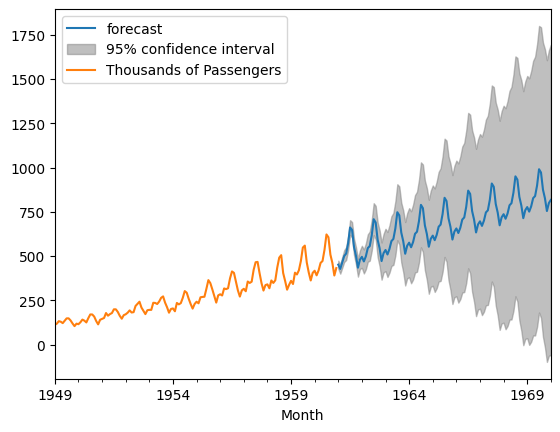

In [46]:
plot_predict(results,'1961-01-01', '1970-01-01')
pasajeros['Thousands of Passengers'].plot()
plt.legend(loc='upper left')
plt.show()